<a href="https://colab.research.google.com/github/mikkon2409/machine_learning_course/blob/main/practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install opendatasets

# Dataset description

The dataset contains complete loan data for all loans issued through the year 2007 - 2015, including the current loan status (Current, Late, Fully Paid, etc.)
and latest payment information. Our dataset contains total of 8,55,969 records
with 73 features including target variable. Moreover, the dataset is very
unbalanced, with approximately 6 % of loans considered as defaulted. This
dataset has different types of features such as categorical, numeric & date.
Some important features:

* loanamnt - Amount of money requested by the borrower.
* intrate - Interest rate of the loan.
* grade - Loan grade with categories A, B, C, D, E, F, G.
* annual_inc - Borrowers annual income.
* purpose - The primary purpose of borrowing.
* installments – Monthly amount payments for opted loan.
* term – duration of the loan until it’s paid off

A default can occur when a borrower is unable to make timely payments, misses
payments, avoids or stops making payments.

In [51]:
import opendatasets as od

od.download('https://www.kaggle.com/rameshmehta/credit-risk-analysis')

Skipping, found downloaded files in "./credit-risk-analysis" (use force=True to force download)


# Задача

Определить является ли кредит невозвратным, на основе таких признаков, как:
* Сумма займа
* Процентная ставка
* Класс кредита
* Годовой доход заёмщика
* Цель займа
* Ежемесячные выплаты
* Срок займа
* и т.д.

Целевой признак: Кредит возвратный/невозвратный

In [52]:
import pandas as pd

data = pd.read_csv('credit-risk-analysis/data.csv', low_memory=False)

Проверим насколько сбалансирован датасет

In [53]:
data['default_ind'].value_counts(normalize=True)

0    0.945714
1    0.054286
Name: default_ind, dtype: float64

Отбросим все признаки, в которых пропущено больше 25% значений

In [54]:
perc_of_nans = (data.isna().sum(axis=0) / data.shape[0])
to_drop = perc_of_nans.loc[perc_of_nans > 0.25]
to_drop.sort_values()

next_pymnt_d                   0.295538
mths_since_last_delinq         0.513818
mths_since_last_major_derog    0.750997
mths_since_last_record         0.846742
desc                           0.857691
inq_fi                         0.984476
all_util                       0.984476
max_bal_bc                     0.984476
open_rv_24m                    0.984476
open_rv_12m                    0.984476
total_bal_il                   0.984476
open_il_12m                    0.984476
total_cu_tl                    0.984476
open_il_6m                     0.984476
open_acc_6m                    0.984476
open_il_24m                    0.984476
inq_last_12m                   0.984476
mths_since_rcnt_il             0.984890
il_util                        0.986438
verification_status_joint      0.999484
dti_joint                      0.999484
annual_inc_joint               0.999484
dtype: float64

In [55]:
clean_data = data.drop(columns=to_drop.index)
clean_data.shape

(855969, 51)

In [56]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          855969 non-null  int64  
 1   member_id                   855969 non-null  int64  
 2   loan_amnt                   855969 non-null  int64  
 3   funded_amnt                 855969 non-null  int64  
 4   funded_amnt_inv             855969 non-null  float64
 5   term                        855969 non-null  object 
 6   int_rate                    855969 non-null  float64
 7   installment                 855969 non-null  float64
 8   grade                       855969 non-null  object 
 9   sub_grade                   855969 non-null  object 
 10  emp_title                   806526 non-null  object 
 11  emp_length                  812908 non-null  object 
 12  home_ownership              855969 non-null  object 
 13  annual_inc    

In [57]:
clean_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,01-12-2011,n,credit_card,Computer,860xx,AZ,27.65,0,01-01-1985,1,3,0,13648,83.7,9,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,01-01-2015,171.62,01-01-2016,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,01-12-2011,n,car,bike,309xx,GA,1.00,0,01-04-1999,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,01-04-2013,119.66,01-09-2013,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,01-12-2011,n,small_business,real estate business,606xx,IL,8.72,0,01-11-2001,2,2,0,2956,98.5,10,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,01-06-2014,649.91,01-01-2016,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,01-12-2011,n,other,personel,917xx,CA,20.00,0,01-02-1996,1,10,0,5598,21.0,37,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,01-01-2015,357.48,01-01-2015,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,01-12-2011,n,other,Personal,972xx,OR,17.94,0,01-01-1996,0,15,0,27783,53.9,38,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,01-01-2016,67.79,01-01-2016,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,Office Assistant,8 years,RENT,31000.0,Verified,01-01-2015,n,debt_consolidation,Debt consolidation,905xx,CA,28.69,0,01-09-2004,0,9,1,14037,82.1,15,f,7055.47,7055.47,3971.880000,3971.88,2944.53,1027.35,0.00,0.00,0.00,01-01-2016,332.10,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,25274.0,17100.0,0
855965,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,Director of Maintenance,10+ years,MORTGAGE,79000.0,Verified,01-01-2015,n,home_improvement,Home improvement,072xx,NJ,3.90,0,01-03-1974,1,5,0,8621,84.5,23,f,16933.26,16933.26,9532.390000,9532.39,7066.74,2465.65,0.00,0.00,0.00,01-01-2016,797.03,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,140285.0,10200.0,0
855966,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,Radiologist Technologist,5 years,RENT,35000.0,Verified,01-01-2015,n,debt_consolidation,Debt consolidation,378xx,TN,30.90,0,01-09-2003,0,9,1,11031,61.3,22,w,11155.50,11155.50,3769.740000,3769.74,1844.50,1925.24,0.00,0.00,0.00,01-01-2016,316.07,01-01-2016,0.0,1,INDIVIDUAL,0,0.0,34178.0,18000.0,0
855967,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,Painter,1 year,RENT,64400.0,Source Verified,01-01-2015,n,debt_consolidation,Debt consolidation,010xx,MA,27.19,1,01-10-2003,2,17,0,8254,30.6,20,w,10447.31,10447.31,3787.670000,3787.67,1552.69,2234.98,0.00,0.00,0.00,01-01-2016,317.86,01-01-2016,1.0,1,INDIVIDUAL,0,0.0,58418.0,27000.0,0


In [58]:
for col in clean_data.columns:
  print(col, '(', clean_data[col].dtype, ')' ' : ', len(clean_data[col].unique()))

id ( int64 ) :  855969
member_id ( int64 ) :  855969
loan_amnt ( int64 ) :  1368
funded_amnt ( int64 ) :  1368
funded_amnt_inv ( float64 ) :  8818
term ( object ) :  2
int_rate ( float64 ) :  520
installment ( float64 ) :  67349
grade ( object ) :  7
sub_grade ( object ) :  35
emp_title ( object ) :  290911
emp_length ( object ) :  12
home_ownership ( object ) :  6
annual_inc ( float64 ) :  48163
verification_status ( object ) :  3
issue_d ( object ) :  103
pymnt_plan ( object ) :  2
purpose ( object ) :  14
title ( object ) :  60955
zip_code ( object ) :  931
addr_state ( object ) :  51
dti ( float64 ) :  4074
delinq_2yrs ( int64 ) :  29
earliest_cr_line ( object ) :  697
inq_last_6mths ( int64 ) :  9
open_acc ( int64 ) :  77
pub_rec ( int64 ) :  31
revol_bal ( int64 ) :  72779
revol_util ( float64 ) :  1339
total_acc ( int64 ) :  134
initial_list_status ( object ) :  2
out_prncp ( float64 ) :  236739
out_prncp_inv ( float64 ) :  254328
total_pymnt ( float64 ) :  493510
total_pymnt_in

Отбросим признаки, которые заведомо коррелируют с другими, неприменимы к задаче или сложны в обработке

In [59]:
clean_data = clean_data.drop(columns=['id', 'member_id', # not applicable for task
                                'grade', # duplicated by sub_grade
                                'emp_title', # too many string values
                                'issue_d', # date values
                                'zip_code', # to many string values
                                'title', # to many string values
                                'earliest_cr_line', # date values
                                'policy_code', #constant column
                                'last_pymnt_d', # date values
                                'last_credit_pull_d' # date values
                                ])
clean_data.shape

(855969, 40)

In [60]:
clean_data.isna().sum(axis=0).sort_values()

loan_amnt                         0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
pub_rec                           0
total_rec_prncp                   0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
application_type                  0
acc_now_delinq                    0
total_rec_int                     0
open_acc                          0
revol_bal                         0
delinq_2yrs                       0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
sub_grade                         0
inq_last_6mths                    0
home_ownership                    0
default_ind                 

Видим, что ещё остались признаки которые содержат пропущенные значения. Т.к. их количество мало в сравнении с размерами датасета, то просто отбросим строки с этими признаками

In [61]:
clean_data = clean_data.dropna(axis=0)

In [62]:
categorical_columns = [c for c in clean_data.columns if clean_data[c].dtype.name == 'object']
numerical_columns   = [c for c in clean_data.columns if clean_data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type']
['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'default_ind']


In [63]:
binary_obj_cols = [c for c in categorical_columns if len(clean_data[c].unique()) == 2]
nonbinary_obj_cols = [c for c in categorical_columns if len(clean_data[c].unique()) != 2]

Обработаем категориальные бинарные признаки

In [64]:
for col in binary_obj_cols:
  first = clean_data[col].unique()[0]
  second = clean_data[col].unique()[1]
  clean_data.at[clean_data[col] == first, col] = 0.0
  clean_data.at[clean_data[col] == second, col] = 1.0

In [65]:
for col in nonbinary_obj_cols:
  print(col, len(clean_data[col].unique()))

sub_grade 35
emp_length 11
home_ownership 6
verification_status 3
purpose 14
addr_state 51


Векторизуем категориальные небинарные признаки

In [66]:
data_nonbinary = pd.get_dummies(clean_data[nonbinary_obj_cols])

Отбросим по одному признаку из каждой категории, т.к. их отсутствие однозначно кодируется другими признаками

In [67]:
data_nonbinary = data_nonbinary.drop(columns=['sub_grade_A1', 'emp_length_1 year', 'home_ownership_ANY', 'verification_status_Not Verified', 'purpose_car', 'addr_state_AK'])
pass

Нормализуем количественные признаки так, чтобы стандартное отклонение стало равно 1

In [68]:
target_col = clean_data['default_ind']
data_numerical = clean_data[numerical_columns]
data_numerical = data_numerical.drop(columns=['default_ind'])
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05
mean,-4.517513e-14,1.129843e-13,-1.127921e-14,-1.236655e-11,-6.236800e-13,7.538995e-16,1.006135e-15,9.861214e-14,-2.738870e-13,-4.273387e-15,1.931097e-13,-2.300598e-16,4.168570e-14,-5.754172e-16,8.768737e-13,-1.635238e-15,2.028134e-13,1.835319e-14,-1.568357e-13,-1.451513e-13,-8.647106e-14,-9.547482e-13,5.882795e-13,6.358146e-14,4.547870e-14,-3.268389e-14,3.091976e-14,3.956813e-17,5.117375e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.674142e+00,-1.674144e+00,-1.682928e+00,-1.803297e+00,-1.734476e+00,-1.111268e+00,-2.213896e+00,-3.722660e-01,-6.982925e-01,-2.009311e+00,-3.371575e-01,-7.569190e-01,-2.364478e+00,-1.991303e+00,-1.062417e+00,-1.062429e+00,-9.526758e-01,-9.527243e-01,-8.490957e-01,-8.546354e-01,-7.820573e-02,-1.099142e-01,-8.272303e-02,-4.487716e-01,-1.107875e-01,-6.671855e-02,-2.058279e-02,-9.166821e-01,-8.499886e-01
25%,-7.570003e-01,-7.569999e-01,-7.595035e-01,-7.409137e-01,-7.265021e-01,-4.401132e-01,-7.513503e-01,-3.722660e-01,-6.982925e-01,-7.036532e-01,-3.371575e-01,-4.644265e-01,-7.309258e-01,-7.250606e-01,-9.828221e-01,-9.828221e-01,-7.093392e-01,-7.093083e-01,-6.703754e-01,-6.351864e-01,-7.820573e-02,-1.099142e-01,-8.272303e-02,-3.893969e-01,-1.107875e-01,-6.671855e-02,-2.058279e-02,-7.172439e-01,-4.794697e-01
50%,-1.357108e-01,-1.357087e-01,-1.350078e-01,-5.844037e-02,-2.218603e-01,-1.819768e-01,-5.989910e-02,-3.722660e-01,-6.982925e-01,-1.440856e-01,-3.371575e-01,-2.242380e-01,3.253607e-02,-1.341476e-01,-1.875485e-01,-1.874057e-01,-3.457993e-01,-3.456060e-01,-3.865571e-01,-3.255704e-01,-7.820573e-02,-1.099142e-01,-8.272303e-02,-3.534777e-01,-1.107875e-01,-6.671855e-02,-2.058279e-02,-3.753672e-01,-2.193181e-01
75%,5.743344e-01,5.743383e-01,5.753190e-01,6.718061e-01,5.651257e-01,2.176943e-01,7.075756e-01,-3.722660e-01,3.468225e-01,6.020046e-01,-3.371575e-01,1.735606e-01,7.746722e-01,5.411815e-01,6.179355e-01,6.181314e-01,3.767049e-01,3.765060e-01,2.885812e-01,2.421313e-01,-7.820573e-02,-1.099142e-01,-8.272303e-02,-2.837896e-01,-1.107875e-01,-6.671855e-02,-2.058279e-02,4.496360e-01,2.037568e-01
max,2.349447e+00,2.349456e+00,2.351136e+00,3.581417e+00,4.086772e+00,1.430837e+02,4.370546e+01,4.378069e+01,7.662627e+00,1.459120e+01,1.440503e+02,1.259609e+02,3.569346e+01,1.210619e+01,4.732047e+00,4.734405e+00,6.357615e+00,6.356003e+00,4.504696e+00,1.002219e+01,1.116125e+02,8.727484e+01,1.053002e+02,6.957951e+00,1.434797e+02,1.729589e+02,8.503396e+02,5.062658e+01,2.619294e+02


Построим корреляционную матрицу для количественных признаков и отбросим признаки с сильной корреляцией

(29, 29)


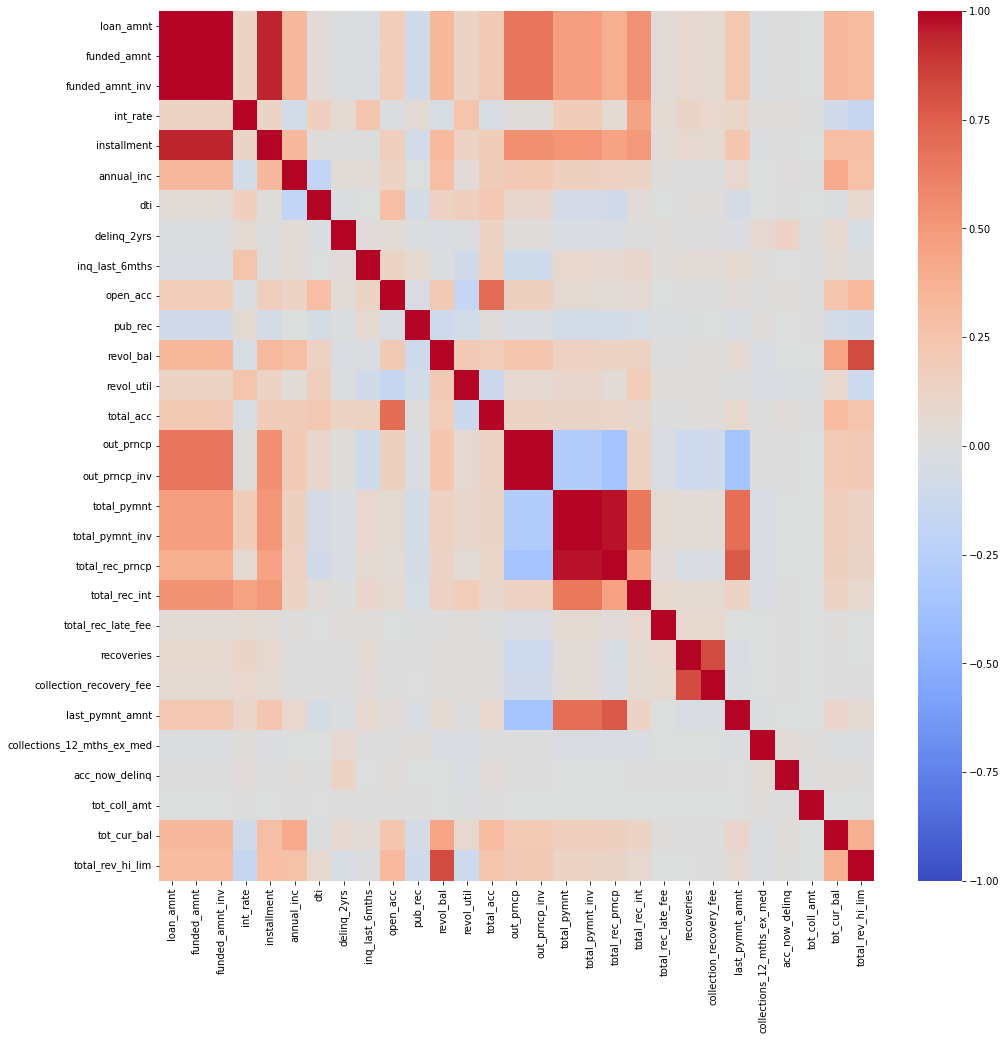

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(16, 16))

correlation_matrix = data_numerical.corr()
print(correlation_matrix.shape)
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, cmap='coolwarm', ax=ax)
pass

In [70]:
data_numerical = data_numerical.drop(columns=[
                                              'funded_amnt',
                                              'funded_amnt_inv',
                                              'installment',
                                              'total_pymnt_inv',
                                              'total_rec_prncp',
                                              'total_rev_hi_lim',
                                              'out_prncp_inv'
                                              ])

In [71]:
import numpy as np

clean_data = pd.concat((data_numerical, data_nonbinary, clean_data[binary_obj_cols].astype(np.float64), target_col), axis = 1)
clean_data.shape

(747260, 141)

In [72]:
clean_data.describe()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,...,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,term,pymnt_plan,initial_list_status,application_type,default_ind
count,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,7.472600e+05,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,...,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.00000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000,747260.000000
mean,-4.517513e-14,-1.236655e-11,7.538995e-16,1.006135e-15,9.861214e-14,-2.738870e-13,-4.273387e-15,1.931097e-13,-2.300598e-16,4.168570e-14,-5.754172e-16,8.768737e-13,2.028134e-13,-1.451513e-13,-8.647106e-14,-9.547482e-13,5.882795e-13,6.358146e-14,4.547870e-14,-3.268389e-14,3.091976e-14,3.956813e-17,0.024883,0.025785,0.037083,0.050859,0.051895,0.055772,0.062587,0.063159,0.054136,0.060229,0.059295,0.058368,0.056955,0.047606,0.041544,0.032983,0.029322,0.028611,...,0.009100,0.009702,0.011940,0.023037,0.023727,0.000593,0.025584,0.018526,0.016024,0.004535,0.002893,0.027847,0.000590,0.001439,0.004971,0.037306,0.005491,0.013698,0.081609,0.033628,0.009139,0.012171,0.035373,0.004404,0.011862,0.002077,0.015573,0.081868,0.007234,0.029453,0.002072,0.022049,0.013264,0.00488,0.002346,0.310498,0.000004,0.474832,0.000517,0.045821
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.155768,0.158493,0.188967,0.219710,0.221815,0.229481,0.242219,0.243248,0.226287,0.237911,0.236177,0.234438,0.231756,0.212931,0.199544,0.178593,0.168707,0.166711,...,0.094958,0.098020,0.108614,0.150023,0.152196,0.024341,0.157891,0.134845,0.125567,0.067191,0.053711,0.164535,0.024286,0.037901,0.070333,0.189510,0.073896,0.116234,0.273768,0.180270,0.095159,0.109649,0.184721,0.066217,0.108265,0.045526,0.123816,0.274164,0.084747,0.169072,0.045467,0.146842,0.114405,0.06969,0.048378,0.462698,0.002004,0.499367,0.022722,0.209096
min,-1.674142e+00,-1.803297e+00,-1.111268e+00,-2.213896e+00,-3.722660e-01,-6.982925e-01,-2.009311e+00,-3.371575e-01,-7.569190e-01,-2.364478e+00,-1.991303e+00,-1.062417e+00,-9.5

Формируем матрицу признаков и вектор целевой переменной

In [73]:
X = clean_data.drop('default_ind', axis = 1)
y = clean_data['default_ind']

Видим, что датасет стал ещё более не сбалансированным

In [74]:
print(y.value_counts(normalize=True))
print(y.value_counts())

0    0.954179
1    0.045821
Name: default_ind, dtype: float64
0    713020
1     34240
Name: default_ind, dtype: int64


Перебалансируем классы и сократим размер выборки (т.к. выборка слишком болшая, чтобы обучаться на ней за разумное время)

In [75]:
default_data = clean_data.loc[clean_data['default_ind'] == 1,:]
nondefault_data = clean_data.loc[clean_data['default_ind'] == 0,:]

default_data = default_data.sample(n=10000)
nondefault_data = nondefault_data.sample(n=10000)

balanced_data = pd.concat([default_data, nondefault_data], axis=0)
balanced_data.shape

(20000, 141)

In [76]:
X = balanced_data.drop(columns=['default_ind'])
y = balanced_data['default_ind']

Разбиваем набор данных на обучающую и тестовую выборки

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, )

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

14000 6000


Построим классификатор К-ближайших соседей (для 10 соседей)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)
print('Train error:', 1 - train_score)
print('Test error:', 1 - test_score)

Train score: 0.9045714285714286
Test score: 0.869
Train error: 0.09542857142857142
Test error: 0.131


Для 5 соседей

In [79]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)
print('Train error:', 1 - train_score)
print('Test error:', 1 - test_score)

Train score: 0.9157142857142857
Test score: 0.8658333333333333
Train error: 0.0842857142857143
Test error: 0.13416666666666666


Для 1 соседа

In [80]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)
print('Train error:', 1 - train_score)
print('Test error:', 1 - test_score)

Train score: 1.0
Test score: 0.8236666666666667
Train error: 0.0
Test error: 0.17633333333333334


# Выводы по методу kNN
Видно, что в данной задаче и с алгоритмом kNN ошибка на тестовой выборке растёт с уменьшением числа соседей, а на тренировочной выборке наблюдаем противоположную ситуацию.

#Общие выводы
В данном домашнем задании мы получили опыт предобработки данных, а также познакомились с таким алгоритмом классификации как "k ближайших соседей". И в ходе экспериментов научились предсказывать является ли выданный кредит невозвратным с точностью 88%

# Multi Layer Perceptron

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm

In [82]:
big_param_grid = {
    'alpha': np.logspace(-3, 2, 21),
    'hidden_layer_sizes': ((100,), (200,), (100, 100), (100, 200), (200, 100), (200, 200)),
    'activation': ('logistic', 'relu', 'tanh'),
    'solver': ('lbfgs', 'adam', 'sgd')
} # the whole pass through the param grid takes too long time (more than 7 hours)

param_grid = {
    'alpha': np.logspace(-3, 2, 5),
    'hidden_layer_sizes': ((100,), (200,), (100, 100), (100, 200), (200, 100), (200, 200)),
    'activation': ('logistic',),
    'solver': ('lbfgs',)
}

results = []
grid = ParameterGrid(param_grid)

for params in tqdm(grid):
    mlp_model = MLPClassifier(**params, max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    scores = {'train_err': np.mean(y_train != y_train_pred),
              'test_err': np.mean(y_test != y_test_pred),
              'train_acc': accuracy_score(y_train, y_train_pred),
              'test_acc': accuracy_score(y_test, y_test_pred)}

    scores.update(**params)

    results.append(scores)

100%|██████████| 30/30 [49:12<00:00, 98.42s/it]


In [96]:
results = pd.DataFrame(results)

    train_err  test_err  train_acc  ...       alpha hidden_layer_sizes  solver
0    0.000000  0.033000   1.000000  ...    0.001000             (100,)   lbfgs
1    0.000000  0.034000   1.000000  ...    0.001000             (200,)   lbfgs
2    0.000000  0.032167   1.000000  ...    0.001000         (100, 100)   lbfgs
3    0.000000  0.034500   1.000000  ...    0.001000         (100, 200)   lbfgs
4    0.000000  0.032667   1.000000  ...    0.001000         (200, 100)   lbfgs
5    0.000000  0.031667   1.000000  ...    0.001000         (200, 200)   lbfgs
6    0.000000  0.030333   1.000000  ...    0.017783             (100,)   lbfgs
7    0.000000  0.032333   1.000000  ...    0.017783             (200,)   lbfgs
8    0.000000  0.030833   1.000000  ...    0.017783         (100, 100)   lbfgs
9    0.000000  0.033000   1.000000  ...    0.017783         (100, 200)   lbfgs
10   0.000000  0.031833   1.000000  ...    0.017783         (200, 100)   lbfgs
11   0.000000  0.030667   1.000000  ...    0.017783 

In [92]:
min_test_err = np.min(results['test_err'])
print(min_test_err)

0.021


In [98]:
results[results['test_err'] == min_test_err]

,train_err,test_err,train_acc,test_acc,activation,alpha,hidden_layer_sizes,solver
19,0.020000,0.021,0.980000,0.979,logistic,5.623413,"(200,)",lbfgs
23,0.018571,0.021,0.981429,0.979,logistic,5.623413,"(200, 200)",lbfgs


In [108]:
inter_res = results[results['test_err'] == min_test_err]
alpha_opt = inter_res.iloc[0].at['alpha']
size_opt = inter_res.iloc[0].at['hidden_layer_sizes']
print(alpha_opt, size_opt)

5.623413251903491 (200,)


In [109]:
results[results['hidden_layer_sizes'] == size_opt]

,train_err,test_err,train_acc,test_acc,activation,alpha,hidden_layer_sizes,solver
1,0.000000,0.034000,1.000000,0.966000,logistic,0.001000,"(200,)",lbfgs
7,0.000000,0.032333,1.000000,0.967667,logistic,0.017783,"(200,)",lbfgs
13,0.000000,0.025500,1.000000,0.974500,logistic,0.316228,"(200,)",lbfgs
19,0.020000,0.021000,0.980000,0.979000,logistic,5.623413,"(200,)",lbfgs
25,0.036214,0.038167,0.963786,0.961833,logistic,100.000000,"(200,)",lbfgs


In [110]:
results[results['alpha'] == alpha_opt]

,train_err,test_err,train_acc,test_acc,activation,alpha,hidden_layer_sizes,solver
18,0.020286,0.022000,0.979714,0.978000,logistic,5.623413,"(100,)",lbfgs
19,0.020000,0.021000,0.980000,0.979000,logistic,5.623413,"(200,)",lbfgs
20,0.018643,0.021167,0.981357,0.978833,logistic,5.623413,"(100, 100)",lbfgs
21,0.018500,0.021500,0.981500,0.978500,logistic,5.623413,"(100, 200)",lbfgs
22,0.018714,0.021167,0.981286,0.978833,logistic,5.623413,"(200, 100)",lbfgs
23,0.018571,0.021000,0.981429,0.979000,logistic,5.623413,"(200, 200)",lbfgs


In [111]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = size_opt,
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.02
0.021


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


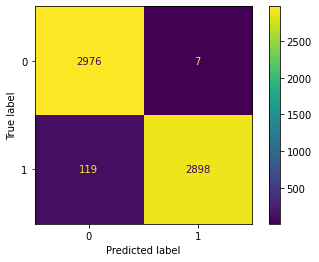

In [112]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlp_model, X_test, y_test) 

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2983
           1       1.00      0.96      0.98      3017

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



# Выводы по методу MLP

Многослойный персептрон показал отличную точность на тестовых данных. Я попробовал обучить 30 вариантов MLP с разными параметрами alpha и разным количеством слоёв, наилучшими для конкретной задачи оказались следующие конфигурации

In [115]:
results[results['test_err'] == min_test_err]

,train_err,test_err,train_acc,test_acc,activation,alpha,hidden_layer_sizes,solver
19,0.020000,0.021,0.980000,0.979,logistic,5.623413,"(200,)",lbfgs
23,0.018571,0.021,0.981429,0.979,logistic,5.623413,"(200, 200)",lbfgs


# SVM

In [116]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
train_score = svm_model.score(X_train, y_train)
test_score = svm_model.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)
print('Train error:', 1 - train_score)
print('Test error:', 1 - test_score)

Train score: 0.9745714285714285
Test score: 0.9691666666666666
Train error: 0.025428571428571467
Test error: 0.03083333333333338


Результаты значительно лучше чем у метода К ближайших соседей, также отмечено быстрое время обучения

# SGD

In [121]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(loss="log", penalty="l2", max_iter=40)
sgd_model.fit(X_train, y_train)
train_score = sgd_model.score(X_train, y_train)
test_score = sgd_model.score(X_test, y_test)
print('Train score:', train_score)
print('Test score:', test_score)
print('Train error:', 1 - train_score)
print('Test error:', 1 - test_score)

Train score: 0.9759285714285715
Test score: 0.975
Train error: 0.02407142857142852
Test error: 0.025000000000000022


Результаты вплотную приблизились к многослойному персептрону, также стоит отметить, что модель сходится к оптимуму очень быстро